<img src="https://farm5.staticflickr.com/4814/45943796321_d72d46d464_b.jpg" width="430">

This is the first blog post of "Object Detection with R-CNN" series.

### Object detection
According to the [wikipedia](https://en.wikipedia.org/wiki/Object_detection):
<blockquote>
Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.
</blockquote>
In the image above, you see a mortor cyclist and 
If you follow all the blog posts in this series, you are able to understand every step of the R-CNN.
All the blog posts use PASCAL VOC 2012 data as an example. 

### Visual Object Classes Challenge 2012 (VOC2012)

The main goal of visual object classes challenge 2012 (VOC2012) is to recognize objects from a number of visual object classes in realistic scenes. 
It is a supervised learning learning problem in that a training set of labelled images is provided.

The twenty object classes that have been selected are:

- **Person**: person
- **Animal**: bird, cat, cow, dog, horse, sheep
- **Vehicle**: aeroplane, bicycle, boat, bus, car, motorbike, train
- **Indoor**: bottle, chair, dining table, potted plant, sofa, tv/monitor

The main competition tasks that I discuss in this blog series are the detection of objects (where it the object? can you create a rectangle bounding box around the object?) and the classification of objects (is this object a person or a cat?).
<img src="https://farm5.staticflickr.com/4863/32074103828_ec91ee420f_b.jpg" width="1024" height="478" alt="Screen Shot 2018-11-18 at 2.31.35 PM">

### What is the goals of this blog?

This first blog post of the series has three goals:

- Section 1: Set up the computing environments by setting up python.
- Section 2: Prepare PASCAL VOC2012 data
- Section 3: Understand PASCAL VOC2012 data and preprocess data.

Let's get started!




### Reference: "Object Detection with R-CNN" series in my blog
- [Part 1: Object Detection with Pascal VOC2012 - data preparation and understanding](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html)


- [Part 2: Object Detection with Pascal VOC2012 - R-CNN overview](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_RCNN_overview.html)


- [Part 3: Object Detection with Pascal VOC2012 - Selective Search](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_selective_search.html)
    - [Implement Local Binary Pattern Descriptor from scratch](https://fairyonice.github.io/implement-lbp-from%20scratch.html)
    
    
- [Part 4: Object Detection with Pascal VOC2012 - CNN feature extraction](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_cnn_feature_extraction.html)


- [Part 5: Object Detection with Pascal VOC2012 - Inference with your own image!](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_inference.html)


# Section 1: Setup environments
I am using Mac OS and I recommend readers to use Mac or Linux environment. (Sorry for Windows users).

To follow the blog series, please install the followings:


### Anaconda 3.7
Please visit [Anaconda 3.7](https://www.anaconda.com/download/#macos) for installation. 
<img src="https://farm5.staticflickr.com/4813/45031214485_2b1b879e3b_b.jpg" width="890"> 

### Keras and Tensorflow
In the later blog [Part 4: Object detection with Pascal data - CNN feature extraction](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_selective_search.html), you will also need Keras and tensorflow installed in your environment. These are very popular deep learning frameworks. You do NOT need GPU to follow this blog series as we will only use pre-trained network. To install them, from your terminal run the following codes:

```
pip install tensorflow
pip install keras
```

<img src="https://farm5.staticflickr.com/4833/45895479252_5b5f94c66d_b.jpg" width="1024" height="160" alt="Screen Shot 2018-11-18 at 1.57.50 PM">

# Section 2: Prepare PASCAL VOC2012 data


### Step 1: Download PASCAL VOC2012 data
Data can be downloaded by visiting [Visual Object Classes Challenge 2012 (VOC2012)](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#devkit), and click **Download the training/validation data (2GB tar file)**.
Choose the location to download the data to be the current working directory of this ipython notebook. 
Downloading the data took me roughtly 6 minutes in my local computer. 

<img src=https://farm5.staticflickr.com/4866/31004219067_b47db85dbc_b.jpg width="500">

### Step 2: Untar the downloaded folder
Untar the downloaded folder "VOCtrainval_11-May-2012.tar". Now your current working directory should look something like this: 
<img src=https://farm5.staticflickr.com/4819/31004408007_fb8bd92c1d_b.jpg height="500">



Record the relative path to the Annotations folder and JPEG image folder.


In [1]:
dir_anno = "VOCdevkit/VOC2012/Annotations"
img_dir  = "VOCdevkit/VOC2012/JPEGImages"

Let's look at the downloaded data using linux command. 
Following commands first count the number of files in Annotations folder and the first 10 file names.


In [2]:
ls $dir_anno | wc -l; ls $dir_anno | head -10

   17125
2007_000027.xml
2007_000032.xml
2007_000033.xml
2007_000039.xml
2007_000042.xml
2007_000061.xml
2007_000063.xml
2007_000068.xml
2007_000121.xml
2007_000123.xml


Run the same command for the JPEGImages data.
In total, there are 17125 xml files in Annotations folder 
and 17125 jpeg files in JPEGImages folder.


In [3]:
ls $img_dir | wc -l;ls $img_dir | head -10

   17125
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg
2007_000061.jpg
2007_000063.jpg
2007_000068.jpg
2007_000121.jpg
2007_000123.jpg


# Section 3: Understand PASCAL VOC2012 data and preprocess data

### Understand annotation data
For each image jpg file in JPEGImages folder, there is corresponding .xml file in Annotation folder.
Let's take a look at one of the xml file (2007_00032.xml)　and its corresponding image　(2007_00032.jpg). 

The image contains 2 airplanes and 2 people. So there are 4 objects in total. The bounding box of these four objects are recorded in xml file as follow. 


<img src="https://farm5.staticflickr.com/4866/45895131612_dcc9b59d29_b.jpg" width="1024" height="584" alt="Screen Shot 2018-11-18 at 1.28.33 PM">

Having annotation infomation of each image in separate file is a bit hard to work with.
We first aggregate all these xml files into a single csv file using panda modules. 

Here we will first create a panda dataframe "df_anno" containing annotations, and then save it into a csv file.

- each row of df_anno corresponds to a single frame. 
- df_anno contains 285 columns.
  - width: width of the frame
  - height: height of the frame
  - Nobj  : The number of objects in the frame
  - fileID: The png file name  
  - For each frame, there are at most 56 objects in one frame. The infomation of the ith object is recorded in df_anno as:
      - ``bbx_i_nm``: The type of object inside of the bounding box i e.g., 
      - ``bbx_i_xmin``: The x coordinate of the minimum corner in bounding box i
      - ``bbx_i_ymin``: The y coordinate of the minimum corner in bounding box i
      - ``bbx_i_xmax``: The x coordinate of the maximum corner in bounding box i
      - ``bbx_i_ymax``: The y coordinate of the maximum corner in bounding box i
      

In [4]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])


print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
df_anno.head()

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: Nobj
  9: fileID
 10: bbx_1_name
 11: bbx_1_xmin
 12: bbx_1_ymin
 13: bbx_1_xmax
 14: bbx_1_ymax
 15: bbx_2_name
 16: bbx_2_xmin
 17: bbx_2_ymin
 18: bbx_2_xmax
 19: bbx_2_ymax
 20: bbx_3_name
 21: bbx_3_xmin
 22: bbx_3_ymin
 23: bbx_3_xmax
 24: bbx_3_ymax
 25: bbx_4_name
 26: bbx_4_xmin
 27: bbx_4_ymin
 28: bbx_4_xmax
 29: bbx_4_ymax
 30: bbx_5_name
 31: bbx_5_xmin
 32: bbx_5_ymin
 33: bbx_5_xmax
 34: bbx_5_ymax
 35: bbx_6_name
 36: bbx_6_xmin
 37: bbx_6_ymin
 38: bbx_6_xmax
 39: bbx_6_ymax
 40: bbx_7_name
 41: bbx_7_xmin
 42: bbx_7_ymin
 43: bbx_7_xmax
 44: bbx_7_ymax
 45: bbx_8_name
 46: bbx_8_xmin
 47: bbx_8_ymin
 48: bbx_8_xmax
 49: bbx_8_ymax
 50: bbx_9_name
 51: bbx_9_xmin
 52: bbx_9_ymin
 53: bbx_9_xmax
 54: bbx_9_ymax
 55: bbx_10_name
 56: bbx_10_xmin
 57: bbx_10_ymin
 58: bbx_10_xmax
 59: bbx_10_ymax
 60: bbx_11_name
 61: 

width  height  depth bbx_0_name  bbx_0_xmin  bbx_0_ymin  bbx_0_xmax  \
0    486     500      3     person       174.0       101.0       349.0   
1    500     281      3  aeroplane       104.0        78.0       375.0   
2    500     366      3  aeroplane         9.0       107.0       499.0   
3    500     375      3  tvmonitor       156.0        89.0       344.0   
4    500     335      3      train       263.0        32.0       500.0   

   bbx_0_ymax  Nobj       fileID     ...      bbx_54_name  bbx_54_xmin  \
0       351.0     1  2007_000027     ...              NaN          NaN   
1       183.0     4  2007_000032     ...              NaN          NaN   
2       263.0     3  2007_000033     ...              NaN          NaN   
3       279.0     1  2007_000039     ...              NaN          NaN   
4       295.0     2  2007_000042     ...              NaN          NaN   

   bbx_54_ymin  bbx_54_xmax  bbx_54_ymax bbx_55_name  bbx_55_xmin  \
0          NaN          NaN          NaN         NaN          NaN   
1          NaN          NaN          NaN         NaN          NaN   
2          NaN          NaN          NaN         NaN          NaN   
3          NaN          NaN          NaN         NaN          NaN   
4          NaN          NaN          NaN         NaN          NaN   

   bbx_55_ymin  bbx_55_xmax  bbx_55_ymax  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 285 columns]

## Save df_anno as a csv file in the current folder

In [5]:
# location to save df_anno.csv
dir_preprocessed = "VOCdevkit/VOC2012"
df_anno.to_csv(os.path.join(dir_preprocessed,"df_anno.csv"),index=False)

Now you should see df_anno.csv file in the directory VOCdevkit/VOC2012.
<img src="https://farm5.staticflickr.com/4832/31004697267_76871566d0_b.jpg" width="1024">

# Section 3: Preliminary analysis 
First step of developing a model is to understand the data. 
#### Histogram of the number of objects per image
Most of the frames contain only 1 object.

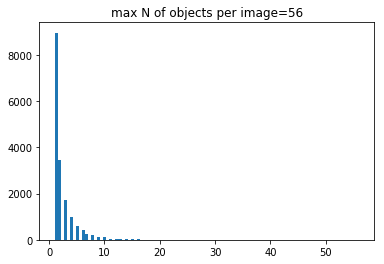

In [6]:
plt.hist(df_anno["Nobj"].values,bins=100)
plt.title("max N of objects per image={}".format(maxNobj))
plt.show()


#### Count the number of objects in each class for each object type
- In total 20 object types exist. 
- Bar plot shows that "person" class is by far the largest and there are 17401 "person" objects in the entire data.


Counter({'person': 17401, 'chair': 3056, 'car': 2492, 'dog': 1598, 'bottle': 1561, 'cat': 1277, 'bird': 1271, 'pottedplant': 1202, 'sheep': 1084, 'boat': 1059, 'aeroplane': 1002, 'tvmonitor': 893, 'sofa': 841, 'bicycle': 837, 'horse': 803, 'motorbike': 801, 'diningtable': 800, 'cow': 771, 'train': 704, 'bus': 685})


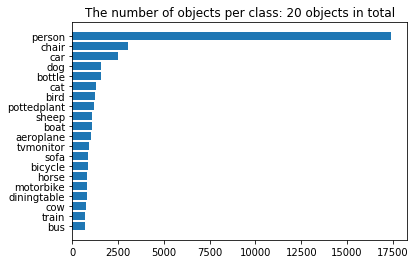

In [7]:
from collections import Counter
class_obj = []
for ibbx in range(maxNobj):
    class_obj.extend(df_anno["bbx_{}_name".format(ibbx)].values)
class_obj = np.array(class_obj)

count             = Counter(class_obj[class_obj != 'nan'])
print(count)
class_nm          = list(count.keys())
class_count       = list(count.values())
asort_class_count = np.argsort(class_count)

class_nm          = np.array(class_nm)[asort_class_count]
class_count       = np.array(class_count)[asort_class_count]

xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm)
plt.title("The number of objects per class: {} objects in total".format(len(count)))
plt.show()

## Visualize randomly selected frames with annotations 

#### Some findings
- The image shape differ across images. 
- Some bounding boxes are on top of each other.

/Users/yumikondo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


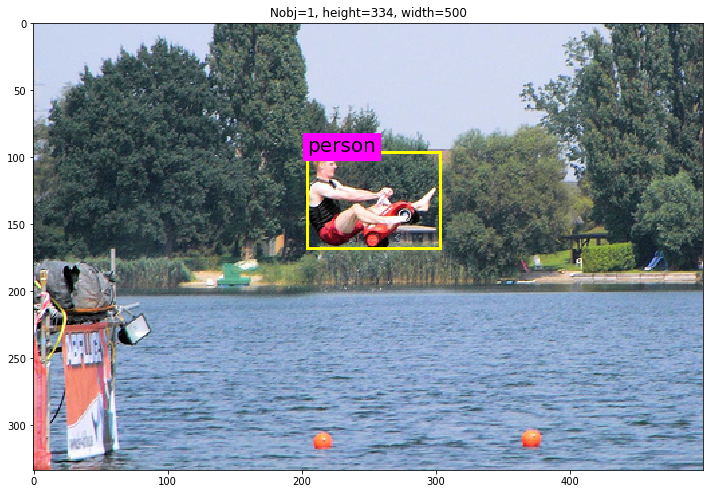

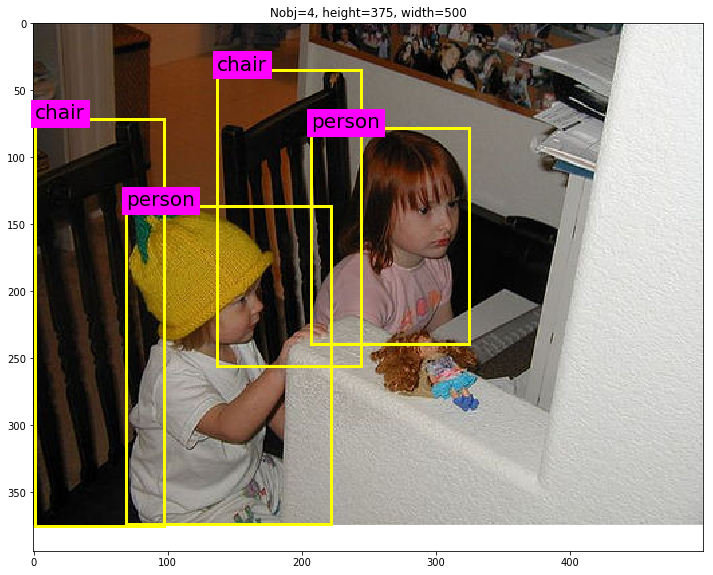

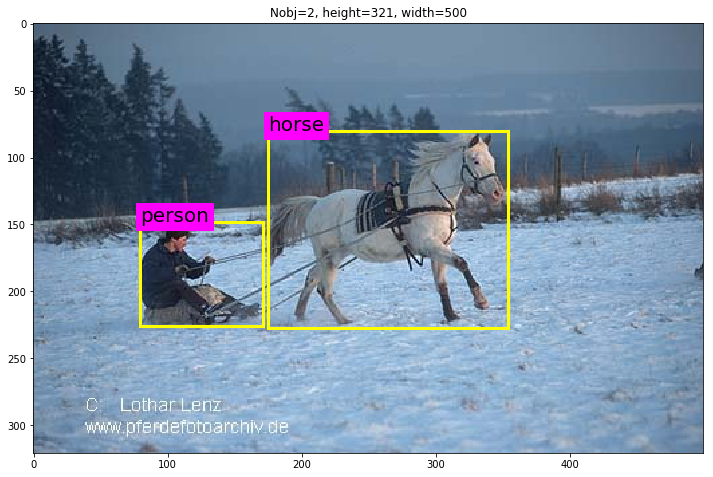

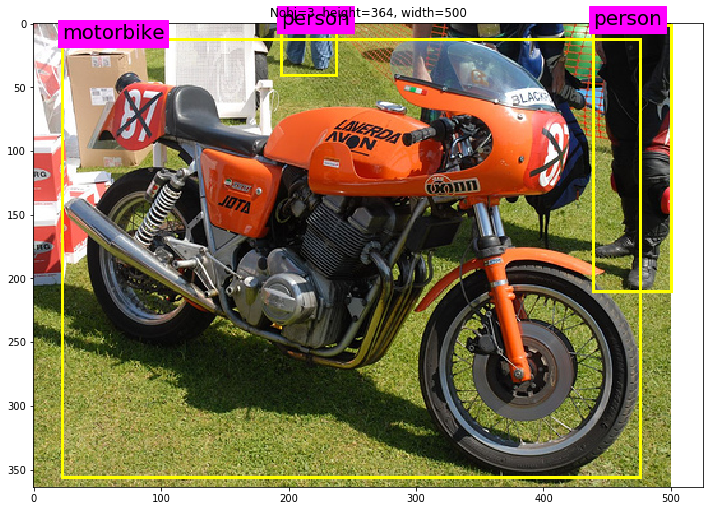

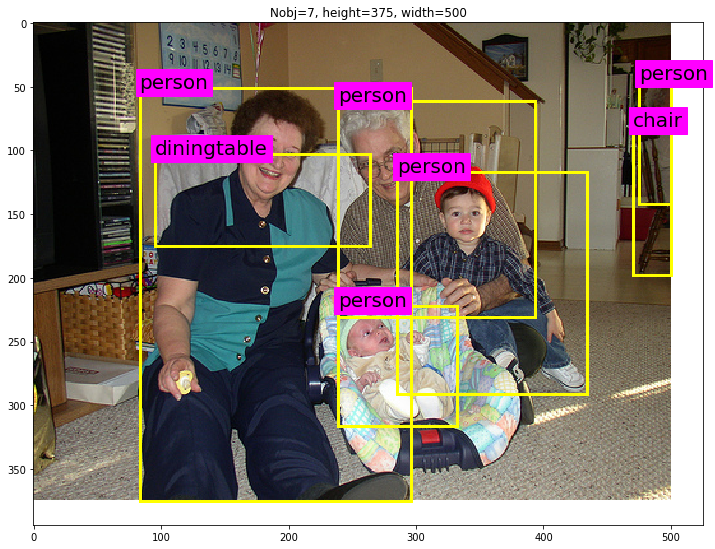

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


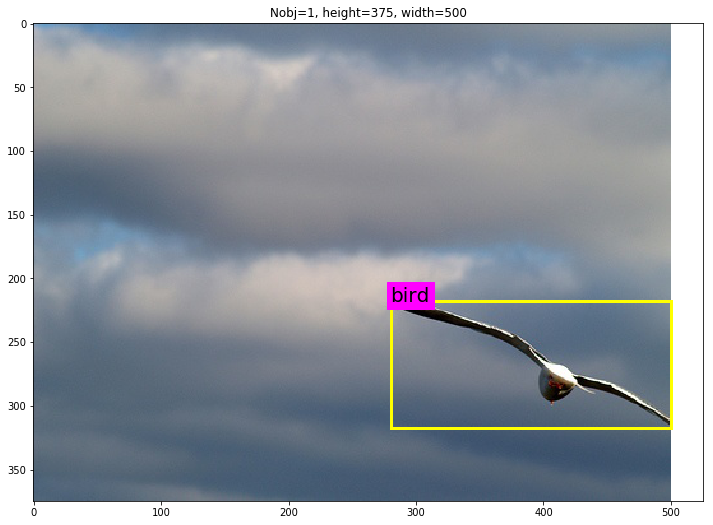

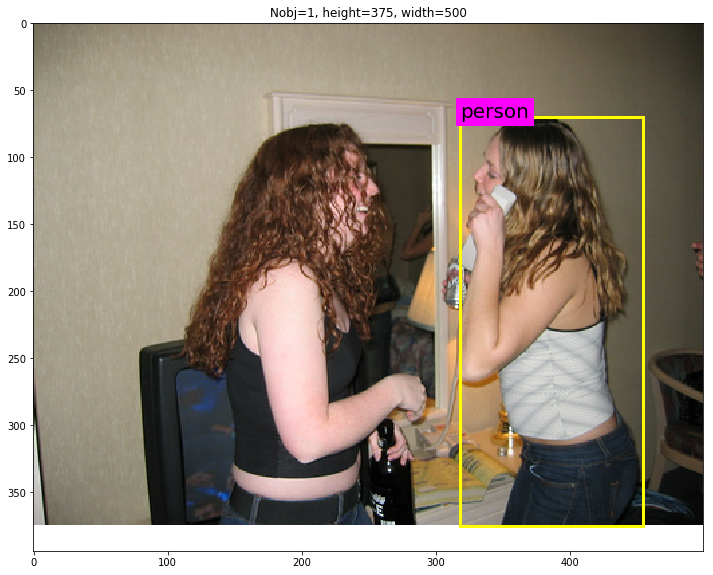

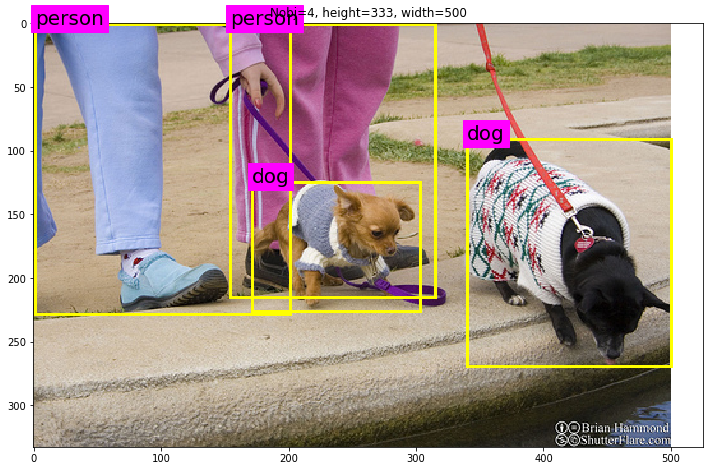

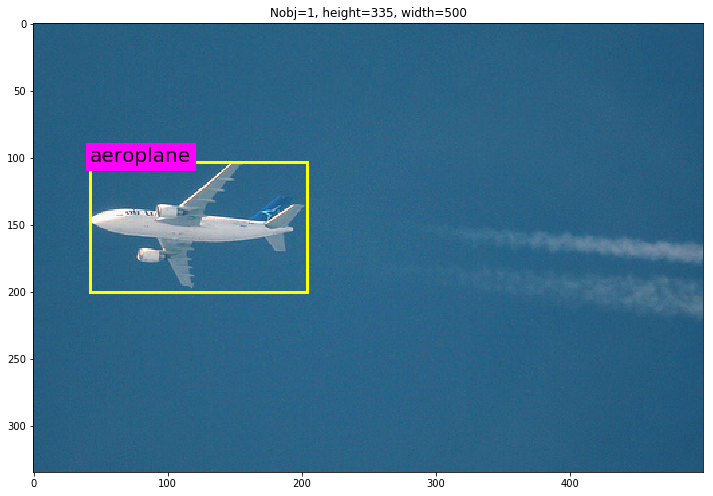

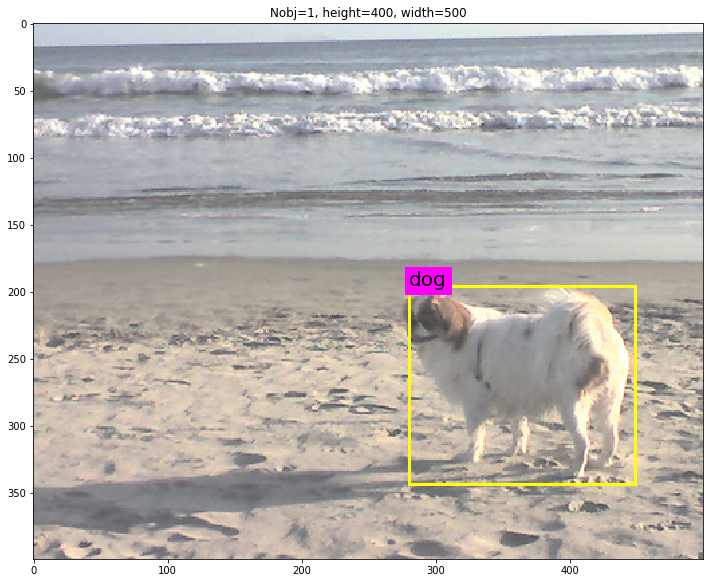

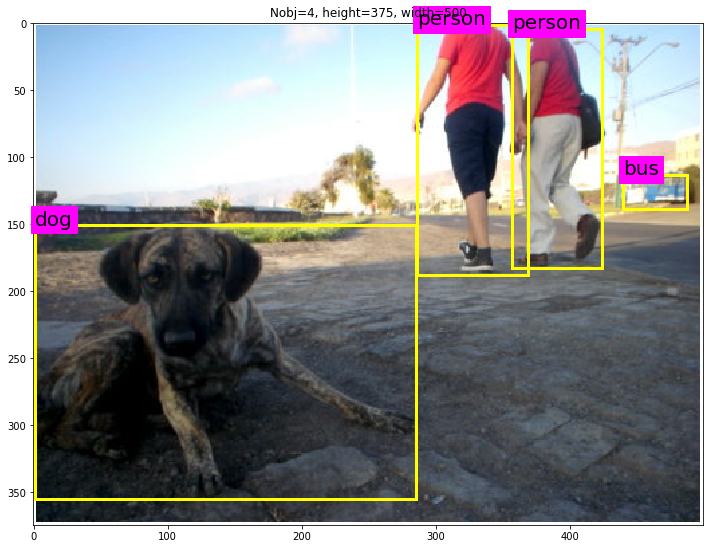

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [8]:
import imageio
def plt_rectangle(plt,label,x1,y1,x2,y2):
    '''
    == Input ==
    
    plt   : matplotlib.pyplot object
    label : string containing the object class name
    x1    : top left corner x coordinate
    y1    : top left corner y coordinate
    x2    : bottom right corner x coordinate
    y2    : bottom right corner y coordinate
    '''
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
    
# randomly select 20 frames    
size = 20    
ind_random = np.random.randint(0,df_anno.shape[0],size=size)
for irow in ind_random:
    row  = df_anno.iloc[irow,:]
    path = os.path.join(img_dir, row["fileID"] + ".jpg")
    # read in image
    img  = imageio.imread(path)

    plt.figure(figsize=(12,12))
    plt.imshow(img) # plot image
    plt.title("Nobj={}, height={}, width={}".format(row["Nobj"],row["height"],row["width"]))
    # for each object in the image, plot the bounding box
    for iplot in range(row["Nobj"]):
        plt_rectangle(plt,
                      label = row["bbx_{}_name".format(iplot)],
                      x1=row["bbx_{}_xmin".format(iplot)],
                      y1=row["bbx_{}_ymin".format(iplot)],
                      x2=row["bbx_{}_xmax".format(iplot)],
                      y2=row["bbx_{}_ymax".format(iplot)])
    plt.show() ## show the plot
